<a href="https://colab.research.google.com/github/kianakiaei/TensorFlow/blob/main/01_neural_network_regression_with_tensorflow_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [2]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__)

2.6.0


## Creating data to view and fit

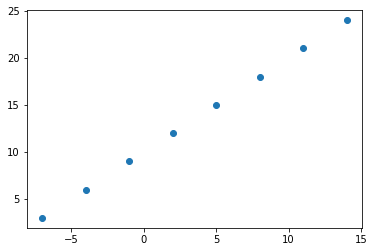

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y);

In [4]:
y == x + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes



In [5]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])

house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [6]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [7]:
x[0].ndim

0

In [8]:
# Turn our NumPy arrays into tensors

x = tf.constant(x)
y = tf.constant(y)

x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [9]:
input_shape = x[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

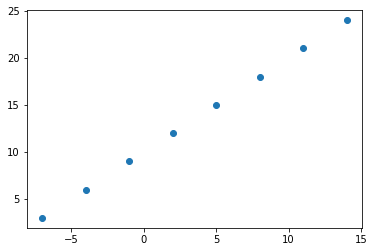

In [10]:
plt.scatter(x, y)

## Step in modeling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hiddem layers of a deep learning model.
2. **Compiling a model** - define the loss function (in others word, the function with tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model
3. **Fitting a model** - letting the model try to find patterns between x & y (features and labels). 

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

# 1. other way
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1)) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              # or loss="mae"
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 588ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 6ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 8ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 5ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748


In [12]:
# Check out x and y
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [14]:
# Add mae to y_pred
y_pred + 11

array([[23.71602]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** -  Here we might add more layers, increase the number of hidden units (All called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Comiling a model** - Here we might change the optimization function or perhaps the **leaning rate** of the optimization function.
3. **Fitting a model** - Here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

We only make one change at a time

**Common ways to improve a deep model:**
* Adding layes
* Increase the number of hidden units
* Change the activation functions (bydefault is None)
* Change the optimization functions
* Change the learning rate (most important hyper parameter of many different neural networks)
* Fitting on more data
* Fitting for longer (increase epochs)

In [15]:
# Let's rebuild our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(1)

])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent)
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 273ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.9748 - mae: 10.9748
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 10.8423 - mae: 10.8423
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 10.7098 - mae: 10.7098
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 10.5773 - mae: 10.5773
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4448 - mae: 10.4448
Epoch 10/100
1/1 [==============================] - 0s 15ms/step - loss: 10.3123 - mae: 10.3123
Epoch 11/100
1/1 [==============================] - 0

In [16]:
# Remind ourselves of the data
x, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

array([[30.158512]], dtype=float32)

In [18]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 100 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(100, activation="relu"),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 310ms/step - loss: 12.3185 - mae: 12.3185
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 11.7696 - mae: 11.7696
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 11.2132 - mae: 11.2132
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6444 - mae: 10.6444
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0534 - mae: 10.0534
Epoch 6/100
1/1 [==============================] - 0s 5ms/step - loss: 9.4344 - mae: 9.4344
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 8.7821 - mae: 8.7821
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 8.0881 - mae: 8.0881
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 7.3552 - mae: 7.3552
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 6.5787 - mae: 6.5787
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - 

In [20]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

# Previous model did better although mae is less here
# Our model is over fitting

array([[31.38265]], dtype=float32)

In [22]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 294ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 12.7017 - mae: 12.7017
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 12.2185 - mae: 12.2185
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7299 - mae: 11.7299
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 11.2333 - mae: 11.2333
Epoch 6/100
1/1 [==============================] - 0s 4ms/step - loss: 10.7262 - mae: 10.7262
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 10.2060 - mae: 10.2060
Epoch 8/100
1/1 [==============================] - 0s 9ms/step - loss: 9.6700 - mae: 9.6700
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 9.1155 - mae: 9.1155
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 8.5396 - mae: 8.5396
Epoch 11/100
1/1 [==============================] - 0s 8ms/st

In [23]:
model.predict([17.0])

# Its better

array([[29.787045]], dtype=float32)

In [25]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 331ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 6ms/step - loss: 13.1147 - mae: 13.1147
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 13.0473 - mae: 13.0473
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9799 - mae: 12.9799
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9125 - mae: 12.9125
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 12.8450 - mae: 12.8450
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 12.7774 - mae: 12.7774
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 12.7098 - mae: 12.7098
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 12.6422 - mae: 12.6422
Epoch 10/100
1/1 [==============================] - 0s 4ms/step - loss: 12.5745 - mae: 12.5745
Epoch 11/100
1/1 [==============================] - 0s 6m

In [26]:
model.predict([17.0])

array([[32.05097]], dtype=float32)

In [27]:
# Let's see if we can make another to improve our model

# Set random seed
tf.random.set_seed(42)

# 1. Create a model (This time with an extra layer with 50 hidden units)
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(50, activation=None),
                             tf.keras.layers.Dense(1)


])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(x, y, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/100
1/1 [==============================] - 0s 344ms/step - loss: 13.1820 - mae: 13.1820
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 12.5071 - mae: 12.5071
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.8279 - mae: 11.8279
Epoch 4/100
1/1 [==============================] - 0s 5ms/step - loss: 11.1425 - mae: 11.1425
Epoch 5/100
1/1 [==============================] - 0s 4ms/step - loss: 10.4485 - mae: 10.4485
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 9.7427 - mae: 9.7427
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 9.0218 - mae: 9.0218
Epoch 8/100
1/1 [==============================] - 0s 5ms/step - loss: 8.2826 - mae: 8.2826
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 7.5221 - mae: 7.5221
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 6.7841 - mae: 6.7841
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - l

In [29]:
model.predict([17.0])

# our best model

array([[27.216782]], dtype=float32)